## Multiple Linear Regression 

Looking at a single variable and its relationship is not enough with real world data.

While people tend to jump to advanced models to model relationships, a simple multiple linear regression, when executed properly, can perform just very well.


**Benefits of linear regression**

*  widely used
* runs fast
* easy to use (not a lot of tuning required)
* highly interpretable
* basis for many other methods




In [0]:
# imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


### Exploring Adverstising Data

 Read data into a DataFrame



In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/ryancfarmar/ff5d7d8d0adf3f4a9cbc8ff065aa0656/raw/7f9f163f8643d558cfb86969e2a632b9822ed0f7/gistfile1.txt',header=0)
data.head(20)

,,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


Desribe the data briefly: What types of variables exist?  What are their summary statistics?

In [3]:
data.describe()

,,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
list(data.columns)

['\t', '\tTV\t', '\tRadio\t', '\tNewspaper\t', '\tSales']

How many instances are there? Visualize the relationships in a scatterplot

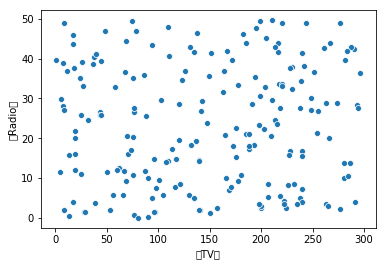

In [7]:
sns.scatterplot(x=data['\tTV\t'], y=data['\tRadio\t'])

### Consider the following questions from your company

This company manufactures and markets this item.

On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?




### First fit a model with using TV to predict sales (Simple Linear Regression)

In [18]:
from sklearn.model_selection import train_test_split

# create X and y

X_train, X_test, y_train, y_test = train_test_split(data[['\tTV\t', '\tRadio\t', '\tNewspaper\t']], data['\tSales'], test_size=0.2, random_state=42)

# instantiate and fit

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# print the coefficients
linreg.coef_


array([0.04472952, 0.18919505, 0.00276111])

In [0]:
predictions = linreg.predict(X_test)

#### Interpret the model coefficients

For every one unit increase in TV advertisements, average sales increase by $0.048.
Intercept: When zero dollars are spent on TV advertisements, the average amount of sales revenue is $7.03.

#### Add All Variables and Recreate Model

Interpret Coefficients and Write MLR equation





y-hat = 2.938889369459412 + 0.04576465**X_1** + 0.18853002**X_2** -0.00103749**X_3** + error term

### Initial Evaluation

What is the Adjusted R^2 the single linear regression and the multiple linear regression? (this is optional, but if you think you know it go for it)

In [24]:
from sklearn.metrics import r2_score
rsquared = r2_score(y_test, predictions)
rsquared

0.899438024100912

Run the Model Utility Test (F-test) on the multiple linear regression. What do you conclude?

Note: There are several **assumptions** which must be considered in order to avoid losing validity of model conclusions

1. **Linearity**: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
2. **No multicollinearity:** Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the Adj. R-squared (see below).
3. **Zero conditional mean**: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
4. **Homoskedasticity**: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
5. **No autocorrelation** (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.


([Source](https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/))